In [39]:
import numpy as np
from scipy.stats import binom

In [57]:
p = 0.3
N = 10

tirada = np.random.binomial(1, p, N)
tirada

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [58]:
def binom_likelihood(p, tirada):
    n_caras = np.sum(tirada)
    n = len(tirada)
    return binom.pmf(n_caras, n, p)

In [59]:
p_estimada = np.linspace(0, 1, 1_000)
likelihood = np.array([binom_likelihood(p, tirada) for p in p_estimada])

Text(0.5, 1.0, 'con 10 datos')

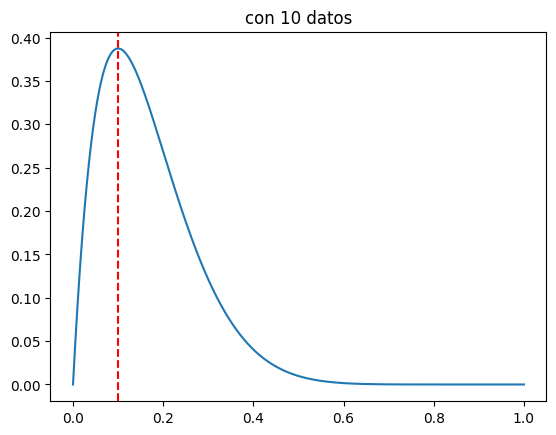

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(p_estimada, likelihood)
ax.axvline(x= sum(tirada)/len(tirada), linestyle = "--", color = "red")
ax.set_title("con 10 datos")

p era 0.3

Text(0.5, 1.0, 'con 100 datos')

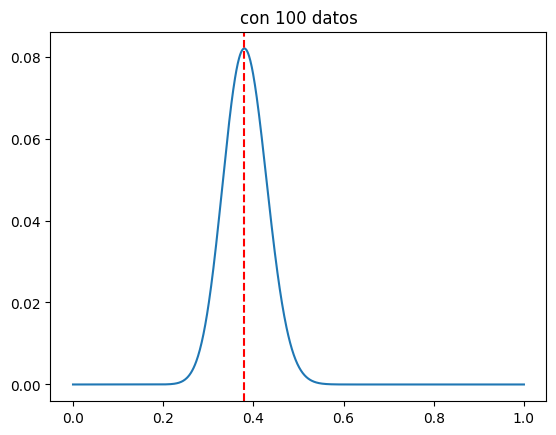

In [61]:
tirada_grande = np.random.binomial(1, p, N*10)
likelihood_grande = np.array([binom_likelihood(p, tirada_grande) for p in p_estimada])

fig, ax = plt.subplots()
ax.plot(p_estimada, likelihood_grande)
ax.axvline(x= sum(tirada_grande)/len(tirada_grande), linestyle = "--", color = "red")
ax.set_title("con 100 datos")

estimado más correcto

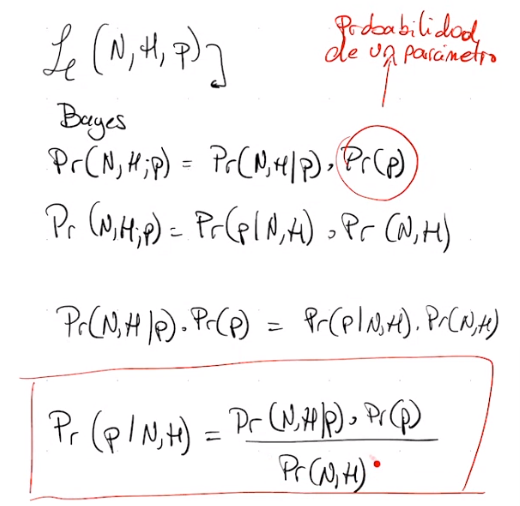

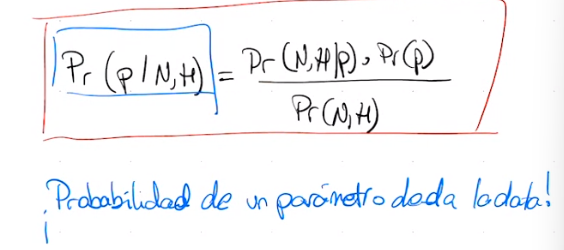

$Pr(N,H|P)$ es la proba de la data, la likelihood  

tengo que suponer una distribución para $P$  
$Pr(P)$ se lo llama Prior de P (distribución a priori)

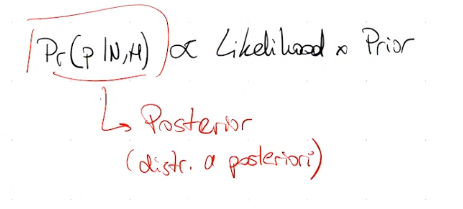

posterior = likelihood x prior / (probabilidad de la data)

In [65]:
def uniform_prior(p): # distribucion que suponemos
    return 1 # pdf de la uniforme
prior = uniform_prior
def posterior_modificada(p):
    return binom_likelihood(p, tirada_grande) * prior(p) # es solo el numerador del posterior

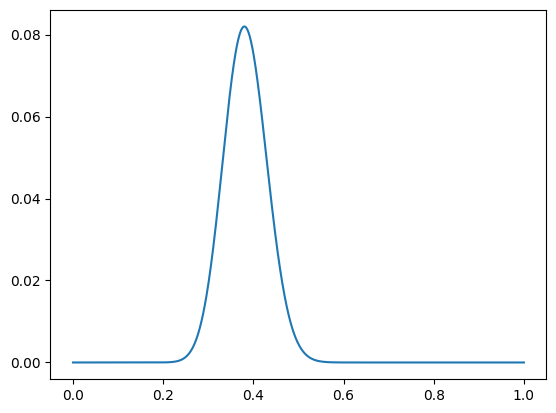

In [66]:
p = np.linspace(0,1,1_001)
fig, ax = plt.subplots()
ax.plot(p, [posterior_modificada(_) for _ in p])
# constante de normalizacion es la integral de la posterior en p
constante_normalizacion = sum(posterior_modificada(_) for _ in p) * np.diff(p)[0]

In [67]:
def posterior(p):
    return posterior_modificada(p) / constante_normalizacion

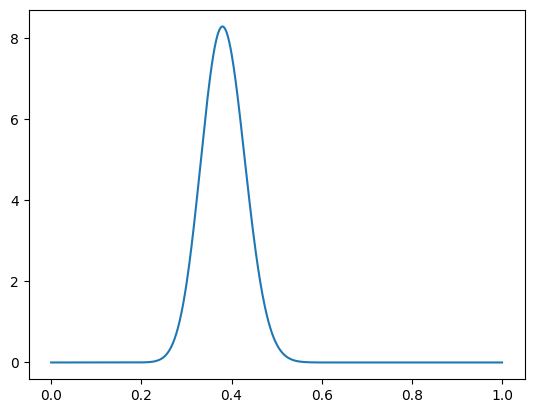

In [71]:
p = np.linspace(0,1,1_001)
fig, ax = plt.subplots()
ax.plot(p, [posterior(_) for _ in p])

la posterior con prior uniforme es la likelihood vista como una probabilidad

Un amigo me dice que la p tiene que ser menor a 0.5

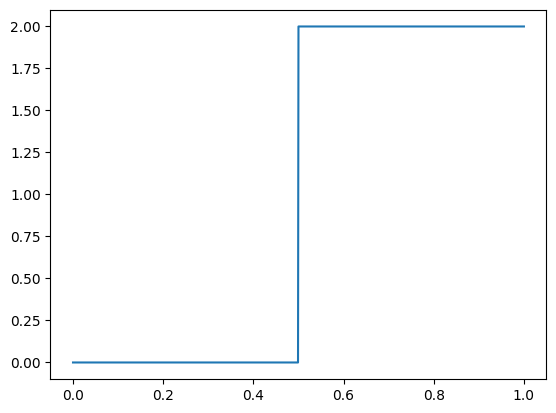

In [72]:
def friend_prior(p):
    if p < 0.5:
        return 0
    return 2

prior = friend_prior
fig, ax = plt.subplots()
ax.plot(p, [friend_prior(_) for _ in p])

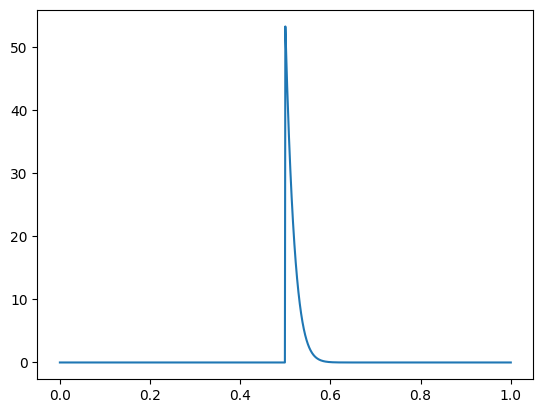

In [73]:
constante_normalizacion = sum(posterior_modificada(_) for _ in p) * np.diff(p)[0]
fig, ax = plt.subplots()
ax.plot(p, [posterior(_) for _ in p])

Prior de enemigo

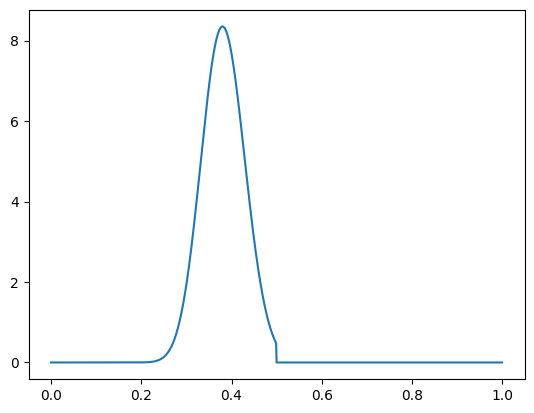

In [74]:
def enemy_prior(p):
    if p < 0.5:
        return 2
    return 0

prior = enemy_prior
constante_normalizacion = sum(posterior_modificada(_) for _ in p) * np.diff(p)[0]
fig, ax = plt.subplots()
ax.plot(p, [posterior(_) for _ in p])